<a href="https://colab.research.google.com/github/erinijapranckeviciene/MF54609_18981_1_20241/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Demo of Artificial Neural Network applications using Keras and Tensorflow

Reference A.Geron Hands-on machine learning.

In [ ]:
#!pip install keras

In [1]:
!pip install tensorflow[and-cuda]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 771.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

#### About Keras
https://keras.io/getting_started/

Keras is TensorFlow’s high-level deep learning API: it allows you to build, train, evaluate, and execute all sorts of neural networks. The original Keras library was developed by François Chollet as part of a research project⁠ and was released as a standalone open source project in March 2015. It quickly gained popularity, owing to its ease of use, flexibility, and beautiful design.

Keras used to support multiple backends, including TensorFlow, PlaidML, Theano, and Microsoft Cognitive Toolkit (CNTK) (the last two are sadly deprecated), but since version 2.4, Keras is TensorFlow-only. Similarly, TensorFlow used to include multiple high-level APIs, but Keras was officially chosen as its preferred high-level API when TensorFlow 2 came out. Installing TensorFlow will automatically install Keras as well, and Keras will not work without TensorFlow installed. In short, Keras and TensorFlow fell in love and got married. Other popular deep learning libraries include PyTorch by Facebook and JAX by Google.

### About Tensorflow

https://www.tensorflow.org/tutorials

At the lowest level, each TensorFlow operation (op for short) is implemented using highly efficient C++ code.⁠ Many operations have multiple implementations called kernels: each kernel is dedicated to a specific device type, such as CPUs, GPUs, or even TPUs (tensor processing units). As you may know, GPUs can dramatically speed up computations by splitting them into many smaller chunks and running them in parallel across many GPU threads. TPUs are even faster: they are custom ASIC chips built specifically for deep learning operations.

TensorFlow’s architecture is shown in Figure below. Most of the time your code will use the high-level APIs (especially Keras and tf.data), but when you need more flexibility you will use the lower-level Python API, handling tensors directly. In any case, TensorFlow’s execution engine will take care of running the operations efficiently, even across multiple devices and machines if you tell it to.

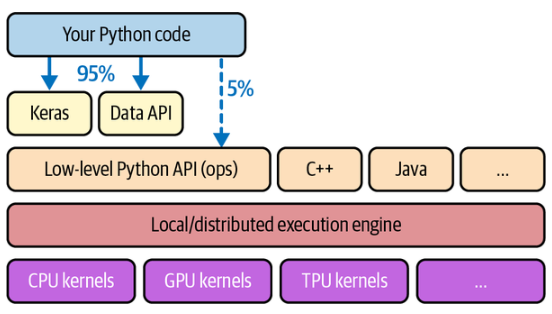


#### Image classifier using sequential API

First, we need to load a dataset. We will use Fashion MNIST, which is a drop-in replacement of MNIST (introduced in Chapter 3). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, and a few more. Let’s load Fashion MNIST. It’s already shuffled and split into a training set (60,000 images) and a test set (10,000 images), but we’ll hold out the last 5,000 images from the training set for validation.

In [2]:
import tensorflow as tf

#TensorFlow is usually imported as tf, and the Keras API is available via tf.keras.

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the shape and data type of the training set:

In [3]:
print(X_train.shape)
print(X_train.dtype)
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
print(X_train.dtype)

(55000, 28, 28)
uint8
float64


For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

#### Some samples from Fashion MNIST
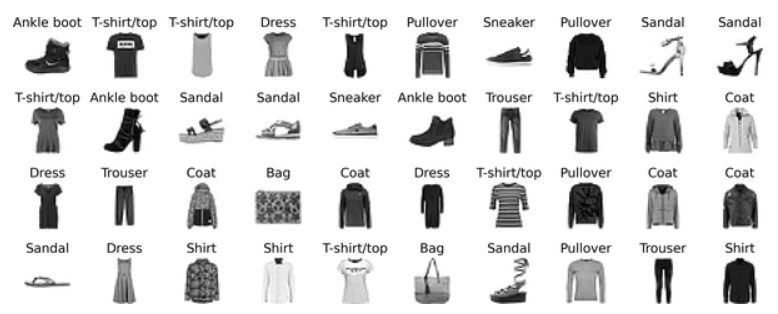


#### Create model using Sequential API

In [5]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

#### Different way of building model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Model summary shows the layers

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#### How to access layers

In [9]:
model.layers
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [10]:
model.get_layer('dense_3') is hidden1

True

#### How to get layers parameters

In [12]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.00101385  0.02864081  0.07430664 ... -0.02545998 -0.00079522
  -0.0489966 ]
 [-0.01416123 -0.06306032  0.03592224 ... -0.00311629  0.01355764
   0.02974759]
 [ 0.00675376 -0.07023898 -0.06338994 ...  0.02177476  0.06735162
   0.06731807]
 ...
 [ 0.06179932 -0.03068787 -0.03233669 ... -0.01306859 -0.04915475
   0.05711864]
 [-0.00316271 -0.00856028 -0.02593774 ...  0.06643216  0.05754483
  -0.04169426]
 [-0.01192963  0.06848279 -0.03649221 ... -0.01493302 -0.02095387
   0.0321894 ]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

### In Keras we have to compile the modl

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### Train and evaluate a model

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6994 - loss: 0.9671 - val_accuracy: 0.8326 - val_loss: 0.5002
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8283 - loss: 0.4987 - val_accuracy: 0.8364 - val_loss: 0.4535
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8446 - loss: 0.4469 - val_accuracy: 0.8444 - val_loss: 0.4320
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8544 - loss: 0.4173 - val_accuracy: 0.8524 - val_loss: 0.4180
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8614 - loss: 0.3964 - val_accuracy: 0.8562 - val_loss: 0.4064
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8671 - loss: 0.3797 - val_accuracy: 0.8594 - val_loss: 0.3959
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8718 - loss: 0.3656 - val_accuracy: 0.8610 - val_loss: 0.3877
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8756 - loss: 0.3534 -

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a Pandas DataFrame and call its plot() method, you get the learning curves.

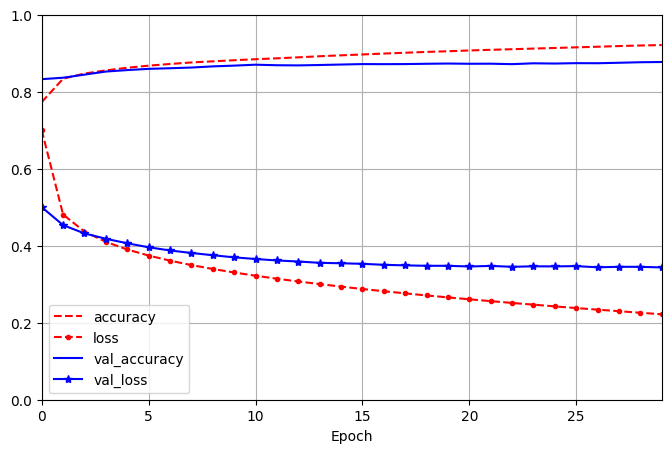

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

#### Evaluate a model

In [16]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8794 - loss: 0.3560


[0.3577858805656433, 0.8777999877929688]

#### Use model to make predictions

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.02, 0.  , 0.8 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

For each instance the model estimates one probability per class, from class 0 to class 9. This is similar to the output of the predict_proba() method in Scikit-Learn classifiers. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 96%, the probability of class 7 (sneaker) is 2%, the probability of class 5 (sandal) is 1%, and the probabilities of the other classes are negligible. In other words, it is highly confident that the first image is footwear, most likely ankle boots but possibly sneakers or sandals. If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the argmax() method to get the highest probability class index for each instance

In [18]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## TASK 1.

In this problem try few other losses, optimizers, and metrics and briefly compare the performances

For losses  https://keras.io/api/losses

For optimizers https://keras.io/api/optimizers

And for metrics https://keras.io/api/metrics

## TASK 2.

If time permits and there is interest you can follow through the A.Geron Chapter 10 continuing with **Building a Regression MLP Using the Sequential API**  learning other elements how to mploy neural networks with Keras.